# Curso de Big Data

## Trabajo Practico 2

### Integrantes del grupo: Sebastián Einstoss, Sofía Marinkovic y Pilar Ruiz Orrico





## Parte 1: Analizando la base


In [1]:
#importamos los paquetes a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

### Ejercicio 2

In [2]:
# Ejercicio 2

#Cargo la base de datos y chehqueo que se vea bien
#df = pd.read_excel("usu_individual_T121.xlsx")
data = pd.read_excel("usu_individual_T121.xlsx")
df = data.copy()
#Chequeamos que se vea bien
df.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPPQHLKLMCDEFIAH00646702,2021,1,1,1,1,43,S,2,675,...,0.0,3.0,40000.0,8.0,8.0,8.0,8.0,0.0,7.0,1377
1,TQRMNOPPRHLKLMCDEFIAH00665104,2021,1,1,1,1,43,S,2,675,...,0.0,2.0,25000.0,6.0,6.0,6.0,6.0,0.0,5.0,723


### Ejercicio 2A

In [3]:
# EJERCICIO 2A 
## Seleccionamos solo los datos de CABA y GBA
df = df[(df["AGLOMERADO"]==32) | (df["AGLOMERADO"]==33)]

#Chequeamos que se vea bien
df.head(10)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
36799,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,0.0,10.0,127500.00,10.0,0.0,10.0,10.0,0.0,10.0,2494
36800,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,0.0,10.0,127500.00,10.0,0.0,10.0,10.0,0.0,10.0,2494
36801,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,1,1,1,S,32,3090,...,0.0,12.0,0.00,12.0,0.0,12.0,12.0,0.0,12.0,0
36802,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,S,32,3090,...,0.0,12.0,0.00,12.0,0.0,12.0,12.0,0.0,12.0,0
36803,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,S,32,3090,...,0.0,12.0,0.00,12.0,0.0,12.0,12.0,0.0,12.0,0
36804,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,4,1,1,S,32,3090,...,0.0,12.0,0.00,12.0,0.0,12.0,12.0,0.0,12.0,0
36805,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,5,1,1,S,32,3090,...,0.0,12.0,0.00,12.0,0.0,12.0,12.0,0.0,12.0,0
36806,TQRMNOPPWHLLLNCDEIIAD00650458,2021,1,1,1,1,1,S,32,3308,...,0.0,12.0,0.00,12.0,0.0,12.0,12.0,0.0,12.0,0
36807,TQRMNOPPWHLLLNCDEIIAD00650458,2021,1,1,2,1,1,S,32,3308,...,0.0,12.0,0.00,12.0,0.0,12.0,12.0,0.0,12.0,0
36808,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,1,1,1,S,32,3745,...,0.0,8.0,43333.33,8.0,0.0,8.0,8.0,0.0,6.0,7389


### Ejercicio 2B

In [4]:
#EJERCICIO 2B
## Descartamos valores sin sentido (Edad e Ingresos negativos)
df = df[(df["CH06"] >= 0) & (df["IPCF"] >= 0 )]

#Chequeamos que se vea bien
df.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
36799,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,0.0,10.0,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494
36800,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,0.0,10.0,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494
36801,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,1,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0
36802,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0
36803,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0


### Ejercicio 2C

In [5]:
#EJERCICIO 2C
##Gráfico de barras que muestra composicion por sexo

#Agrupamos por sexo la base df

df_sexo = df.groupby(by=["CH04"]).agg({"CH04":"count"})
df_sexo.head(5)


,CH04
CH04,
1,1918
2,2131


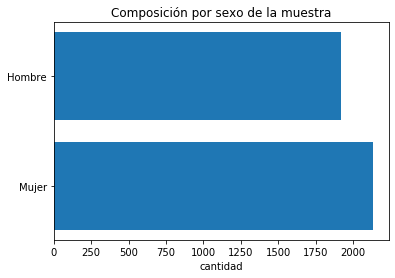

In [6]:
#Base para el grafico

sexo = ('Hombre', 'Mujer')
y_pos = np.arange(len(df_sexo))
cantidad = df_sexo["CH04"]
fig, ax = plt.subplots()

hbars = ax.barh(y_pos, cantidad)
ax.set_yticks(y_pos)
ax.set_yticklabels(sexo)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('cantidad')
ax.set_title('Composición por sexo de la muestra')


plt.show()

### Ejercicio 2D

In [7]:
#EJERCICIO 2D
##Matriz de correlcion

#Seleccionamos las variables de interes y las guardamos en un nuevo dataframe
df1 = df[["CH04", "CH07","CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]]

#Chequeamos que se vea bien
df1.head(5)

,CH04,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF
36799,1,1,1,6,1,0,127500.0
36800,2,1,1,6,1,0,127500.0
36801,1,2,1,6,1,0,0.0
36802,2,2,1,6,1,0,0.0
36803,2,5,1,5,3,3,0.0


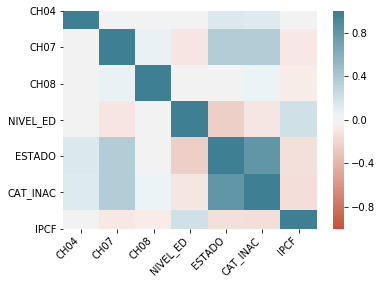

In [8]:
#Armamos la matriz
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Ejercicio 2E

In [9]:
#EJERCICIO 2E

##Desocupados

desocupados = df[df["ESTADO"]==2]

cant_desocupados = desocupados.shape[0]
print(cant_desocupados)

213


In [10]:
## Inactivos

inactivos = df[df["ESTADO"]==3]
cant_inactivos = inactivos.shape[0]
print(cant_inactivos)

1682


In [11]:
##Ocupados
ocupados = df[df["ESTADO"]==1]

cant_ocupados = ocupados.shape[0]
print(cant_ocupados)

1737


In [12]:
##juntamos los tres estados
pea = desocupados.append(ocupados)
total = pea.append(inactivos)
len(total)


3632

In [13]:
##IPCF por estado
media_ipcf = total.groupby(by=["ESTADO"]).agg({"IPCF":"mean"})
media_ipcf.head(5)


,IPCF
ESTADO,
1,23384.514980
2,11920.305164
3,16739.573775


### Ejercicio 2F

In [14]:
#EJERCICIO 2F
ae = pd.read_excel("tabla_adulto_equiv.xlsx")
ae.head(40)

,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Edad,Mujeres,Varones,NaN
3,NaN,NaN,NaN,NaN
4,Menor de 1 año,0.35,0.35,NaN
5,1año,0.37,0.37,NaN
6,2 años,0.46,0.46,NaN
7,3 años,0.51,0.51,NaN
8,4 años,0.55,0.55,NaN
9,5 años,0.6,0.6,NaN


In [15]:
#Acomodamos el archivo para poder trabajar
#eliminamos columnas
ae.drop(["Unnamed: 3"], axis = 1,inplace = True)

#chequeamos
ae.head(10)

,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Edad,Mujeres,Varones
3,NaN,NaN,NaN
4,Menor de 1 año,0.35,0.35
5,1año,0.37,0.37
6,2 años,0.46,0.46
7,3 años,0.51,0.51
8,4 años,0.55,0.55
9,5 años,0.6,0.6


In [16]:
### eliminamos las filas que no sirven
ae.dropna(inplace = True)
#chequeamos
ae.head(30)

,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2
2,Edad,Mujeres,Varones
4,Menor de 1 año,0.35,0.35
5,1año,0.37,0.37
6,2 años,0.46,0.46
7,3 años,0.51,0.51
8,4 años,0.55,0.55
9,5 años,0.6,0.6
10,6 años,0.64,0.64
11,7 años,0.66,0.66
12,8 años,0.68,0.68


In [17]:
#Acomodamos los nombres de las columnas
ae.columns = ae.iloc[0]
ae.drop(2,inplace=True)
ae.reset_index()
#chequeamos
ae.head(30)

2,Edad,Mujeres,Varones
4,Menor de 1 año,0.35,0.35
5,1año,0.37,0.37
6,2 años,0.46,0.46
7,3 años,0.51,0.51
8,4 años,0.55,0.55
9,5 años,0.6,0.6
10,6 años,0.64,0.64
11,7 años,0.66,0.66
12,8 años,0.68,0.68
13,9 años,0.69,0.69


In [18]:
#Reacomodamos las filas
ae.reset_index()
ae = ae.melt(id_vars='Edad',value_vars=['Mujeres','Varones'],var_name='sexo')

In [19]:
ae.head()

,Edad,sexo,value
0,Menor de 1 año,Mujeres,0.35
1,1año,Mujeres,0.37
2,2 años,Mujeres,0.46
3,3 años,Mujeres,0.51
4,4 años,Mujeres,0.55


In [20]:
#Reordenamos las categorias por comodidad
ae.loc[ae['sexo'] == "Mujeres", 'sexo'] = 2
ae.loc[ae['sexo']== "Varones", 'sexo'] = 1
#Generamos sub-bases de datos con el fin de poder hacer el trabajo de forma ordenada
aem = ae[ae['sexo'] == 2]
aeh = ae[ae['sexo'] == 1].copy()

#reseteamos el indice de la segunda base
aeh.reset_index(inplace = True)


In [21]:
#Generamos un dataset con edades desde el 0 hasta el 110, para ambos sexos
m = pd.DataFrame(columns=["Edad"])
m.loc[:,"Edad"] = np.arange(111)
#agregamos columna para el adulto equivalente
m['adulto_equiv'] = 0

#Replicamos para varones
h=m.copy()


In [22]:
#Generamos una funcion que nos asignara el adulto equivalente por sexo
def clasificador(df_aux):
    if (df_aux['Edad']<=17):
        return aem['value'][df_aux['Edad']]
    if (df_aux['Edad']>=18) and (df_aux['Edad']<=29):
        return aem['value'][18]
    if (df_aux['Edad']>=30) and (df_aux['Edad']<=45):
        return aem['value'][19]
    if (df_aux['Edad']>=46) and (df_aux['Edad']<=60):
        return aem['value'][20]
    if (df_aux['Edad']>=61) and (df_aux['Edad']<=75):
        return aem['value'][21]
    if (df_aux['Edad']>75):
        return aem['value'][22]
        

In [23]:
#Lo aplicamos a mujeres y renombramos las columnas por comodidad
m['adulto_equiv'] = m.apply(clasificador,axis=1)
m['CH04']= 2
m = m.rename(columns={'Edad':"CH06"})


In [24]:
#Hacemos lo mismo para los hombres
def clasificador_2(df_aux):
    if (df_aux['Edad']<=17):
        return aeh['value'][df_aux['Edad']]
    if (df_aux['Edad']>=18) and (df_aux['Edad']<=29):
        return aeh['value'][18]
    if (df_aux['Edad']>=30) and (df_aux['Edad']<=45):
        return aeh['value'][19]
    if (df_aux['Edad']>=46) and (df_aux['Edad']<=60):
        return aeh['value'][20]
    if (df_aux['Edad']>=61) and (df_aux['Edad']<=75):
        return aeh['value'][21]
    if (df_aux['Edad']>75):
        return aeh['value'][22]

In [25]:
#Lo aplicamos a los varones y renombramos las columnas por comodidad
h['adulto_equiv'] = h.apply(clasificador_2,axis=1)
h['CH04']= 1
h = h.rename(columns={'Edad':"CH06"})

In [26]:
#Concatenamos ambos datasets para realizar un solo merge.
cuadros_a_concatenar =[m,h]
adequi =pd.concat(cuadros_a_concatenar)
adequi.head(20)

,CH06,adulto_equiv,CH04
0,0,0.35,2
1,1,0.37,2
2,2,0.46,2
3,3,0.51,2
4,4,0.55,2
5,5,0.60,2
6,6,0.64,2
7,7,0.66,2
8,8,0.68,2
9,9,0.69,2


In [27]:
#Creamos una columna con el adulto equivalente en el dataframe original
df = df.merge(adequi, on = ['CH04','CH06'], how = 'left')

#Para controlar que este bien el merge dropeamos duplicados y seteamos de nuevo el index
df.drop_duplicates(inplace = True)
df.reset_index( drop = True , inplace = True)

df.head(5)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,adulto_equiv
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,10.0,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494,1.02
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,10.0,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494,0.76
2,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,1,1,1,S,32,3090,...,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,1.00
3,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,S,32,3090,...,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,0.76
4,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,S,32,3090,...,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,0.76


In [28]:
#Creamos ad_equiv_hogar a partir del groupby
df2 = df.groupby( by = ['CODUSU']).agg({'adulto_equiv':sum})
df2.rename(columns = {'adulto_equiv': 'ad_equiv_hogar'}, inplace = True)
df2.head()



,ad_equiv_hogar
CODUSU,
TQRMNOPPQHJMQLCDEIJAH00702455,1.67
TQRMNOPPQHJNMQCDEIJAH00698190,3.10
TQRMNOPPQHJONQCDEIJAH00693114,1.76
TQRMNOPPQHKMOSCDEIJAH00656008,2.53
TQRMNOPPQHLMPPCDEIJAH00701610,3.92


In [29]:
#Por ultimo agregamos la columna ad_equiv_hogar a df
df = df.merge(df2, on = ['CODUSU'], how = 'left')

#Para controlar que este bien el merge dropeamos duplicados y seteamos de nuevo el index
df.drop_duplicates(inplace = True)
df.reset_index( drop = True , inplace = True)

df.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,adulto_equiv,ad_equiv_hogar
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494,1.02,1.78
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494,0.76,1.78
2,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,1,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,1.00,4.44
3,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,0.76,4.44
4,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,0.76,4.44


### Ejercicio 3

In [30]:
#EJERCICIO 3

#cantididad de individuos que respondieron
respondieron = df[df["ITF"] > 0]
respondieron.shape[0]

2500

In [31]:
#Cantididad de individuos que no respondieron

norespondieron = df[ df["ITF"] <= 0]
norespondieron.shape[0]

1549

### Ejercicio 4

In [32]:
#EJERCICIO 4
#agregamos columna ingreso_necesario
respondieron["ingreso_necesario"] = 18914 * respondieron["ad_equiv_hogar"]
respondieron.head()

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,adulto_equiv,ad_equiv_hogar,ingreso_necesario
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,10.0,0.0,10.0,10.0,0.0,10.0,2494,1.02,1.78,33666.92
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,10.0,0.0,10.0,10.0,0.0,10.0,2494,0.76,1.78,33666.92
9,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,1,1,1,S,32,3745,...,8.0,0.0,8.0,8.0,0.0,6.0,7389,0.83,2.52,47663.28
10,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,3,1,1,S,32,3745,...,8.0,0.0,8.0,8.0,0.0,6.0,7389,1.02,2.52,47663.28
11,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,2,1,1,S,32,3745,...,8.0,0.0,8.0,8.0,0.0,6.0,7389,0.67,2.52,47663.28


### Ejercicio 5

In [33]:
#EJERCICIO 5

#creamos una columna
respondieron["pobre"] = ""
respondieron.head()

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,0.0,10.0,10.0,0.0,10.0,2494,1.02,1.78,33666.92,
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,0.0,10.0,10.0,0.0,10.0,2494,0.76,1.78,33666.92,
9,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,1,1,1,S,32,3745,...,0.0,8.0,8.0,0.0,6.0,7389,0.83,2.52,47663.28,
10,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,3,1,1,S,32,3745,...,0.0,8.0,8.0,0.0,6.0,7389,1.02,2.52,47663.28,
11,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,2,1,1,S,32,3745,...,0.0,8.0,8.0,0.0,6.0,7389,0.67,2.52,47663.28,


In [34]:
#Completamos la columna
respondieron['pobre'] = np.where(respondieron['ITF']<respondieron['ingreso_necesario'],1,0)
#chequeamos que funcione
respondieron.head(5)



C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,0.0,10.0,10.0,0.0,10.0,2494,1.02,1.78,33666.92,0
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,0.0,10.0,10.0,0.0,10.0,2494,0.76,1.78,33666.92,0
9,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,1,1,1,S,32,3745,...,0.0,8.0,8.0,0.0,6.0,7389,0.83,2.52,47663.28,0
10,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,3,1,1,S,32,3745,...,0.0,8.0,8.0,0.0,6.0,7389,1.02,2.52,47663.28,0
11,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,2,1,1,S,32,3745,...,0.0,8.0,8.0,0.0,6.0,7389,0.67,2.52,47663.28,0


In [35]:
#cantidad de pobres
pobres = respondieron[respondieron['pobre']==1]
pobres.shape[0]

838



## Parte 2: Clasificación


### Ejercicio 1

In [36]:
#chequeamos la cantidad de columnas de las bases
respondieron.shape[1]


181

In [37]:
norespondieron.shape[1]

179

In [38]:
#Limpliamos las base respondieron

respondieron.drop(['PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'P21', 'DECOCUR', 'IDECOCUR', 'RDECOCUR', 'GDECOCUR', 'PDECOCUR', 'ADECOCUR', 'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'IDECINDR', 'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'PONDII', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'PONDIH', 'adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario'],axis=1, inplace = True)

#chequeamos cantidad de columnas
respondieron.shape[1]

C:\Users\usuario\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


121

In [39]:
#Limpliamos las base norespondieron
norespondieron.drop(['PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'P21', 'DECOCUR', 'IDECOCUR', 'RDECOCUR', 'GDECOCUR', 'PDECOCUR', 'ADECOCUR', 'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'IDECINDR', 'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'PONDII', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'PONDIH', 'adulto_equiv', 'ad_equiv_hogar'],axis=1, inplace = True)

#chequeamos cantidad de columnas
norespondieron.shape[1]

120

### Ejercicio 2

In [40]:
#separamos las bases de entrenamiento y testeo
respondieron_train, respondieron_test = train_test_split(respondieron, test_size=0.3,
                                                    random_state=101)

#chequeamos tamaño base entrenamiento
respondieron_train.shape[0]

1750

In [41]:
#chequeamos tamaño base testeo
respondieron_test.shape[0]

750

### Ejercicio 3
##### Para la base train

In [42]:
#armamos vector de la variable dependiente
y_train= respondieron_train["pobre"].copy()
#Reemplazamos NaN
mediana_y_train = y_train.median()
y_train = y_train.fillna(mediana_y_train)
y_train.head()

874     0
599     0
1200    1
2653    0
1982    0
Name: pobre, dtype: int32

In [43]:
#armamos matriz de las varibles independientes (sacamos "pobre" y otras variables str)
x_train = respondieron_train.drop(['pobre', 'CODUSU', 'CH05','PP09A_ESP','PP09C_ESP','IMPUTA'], axis=1).copy()
#convertimos en dummy a 'MAS_500'
x_train['MAS_500'] = np.where(x_train['MAS_500']=='S',1,0)
#Reemplazamos NaN
mediana_x_train = x_train.median()
x_train = x_train.fillna(mediana_x_train)
#chequeamos
x_train.head(10)

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,CH03,...,PP11L,PP11L1,PP11M,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T
874,2021,1,1,1,1,1,1,32,6281,1,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
599,2021,1,1,3,1,1,1,32,878,3,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
1200,2021,1,1,3,1,1,1,33,4643,3,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
2653,2021,1,1,1,1,1,1,33,3704,1,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
1982,2021,1,1,1,1,1,1,33,8685,1,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
2880,2021,1,1,1,1,1,1,33,3052,1,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
3239,2021,1,1,3,1,1,1,33,5042,3,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
1431,2021,1,1,2,1,1,1,33,7795,3,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
3184,2021,1,1,4,1,1,1,33,6150,3,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
633,2021,1,1,2,1,1,1,32,1667,2,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0


###### Para la base test


In [44]:
#armamos vector de la variable dependiente
y_test= respondieron_test["pobre"].copy()
#Reemplazamos NaN
mediana_y_test = y_test.median()
y_test = y_test.fillna(mediana_y_test)
y_test=y_test.astype(np.float64)
y_test.head()

3920    0.0
352     0.0
757     0.0
1867    0.0
410     0.0
Name: pobre, dtype: float64

In [45]:
#armamos matriz de las varibles independientes (sacamos "pobre" y otras variables str)
x_test= respondieron_test.drop(['pobre', 'CODUSU', 'CH05','PP09A_ESP','PP09C_ESP', 'IMPUTA'], axis=1).copy()
#convertimos en dummy a 'MAS_500'
x_test['MAS_500'] = np.where(x_test['MAS_500']=='S',1,0)
#Reemplazamos NaN
mediana_x_test = x_test.median()
x_test = x_test.fillna(mediana_x_test)
#chequeamos
x_test.head(10)

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,CH03,...,PP11L,PP11L1,PP11M,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T
3920,2021,1,1,3,0,1,1,33,3831,3,...,0.0,0.5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
352,2021,1,1,1,1,1,1,32,3156,1,...,0.0,0.5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
757,2021,1,1,2,1,1,1,32,2253,2,...,0.0,2.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0,2.0
1867,2021,1,1,4,0,1,1,33,2347,5,...,0.0,0.5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
410,2021,1,1,2,1,1,1,32,2447,2,...,0.0,0.5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
794,2021,1,1,2,1,1,1,32,3261,2,...,0.0,0.5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
3924,2021,1,1,1,1,1,1,33,4564,1,...,0.0,0.5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
1802,2021,1,1,1,1,1,1,33,2653,1,...,0.0,0.5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
673,2021,1,1,1,1,1,1,32,118,1,...,0.0,0.5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
1939,2021,1,1,1,1,1,1,33,3362,1,...,0.0,0.5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0


### Ejercicio 4

#### LOGIT

In [46]:
# Ajustamos el clasificador con el metodo fit() 
log_reg = LogisticRegression().fit(x_train, y_train)
y_pred = log_reg.predict_proba(x_test)[:,1]

y_pred = np.where(y_pred > 0.5, 1, y_pred)
y_pred = np.where(y_pred <= 0.5, 0, y_pred)


C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
#Matrz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :')
print(matriz_confusion) 


Confusion Matrix :
[[444  55]
 [156  95]]


In [48]:
#Accuracy
print('"La precisión del modelo es:',accuracy_score(y_test, y_pred))

"La precisión del modelo es: 0.7186666666666667


In [49]:
# AUC y ROC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

AUC: 0.63


In [50]:
#Curva de ROC
def grafica_curva_roc(fpr, tpr):
    '''
    Grafica la curva de ROC y muestra el gráfico en pantalla
    Input:
        fpr(float): tasa de falsos positivos
        tpr(float): tasa de verdaderos positivos
    '''
    plt.plot(fpr, tpr, color='darkblue', label='Reg_Log')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()  
 

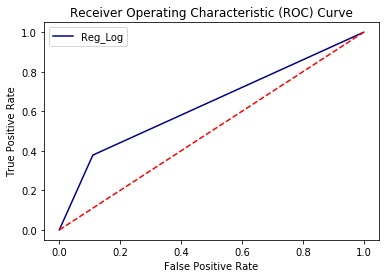

In [51]:
grafica_curva_roc(fpr, tpr)

#### Análisis discriminante lineal

In [52]:
#Modelo
lda = LinearDiscriminantAnalysis(n_components=2)
lda = lda.fit(x_train, y_train)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(115, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [53]:
# Predecimos con el modelo de Análisis discriminante lineal sobre las X test
y_pred_lda = lda.predict(x_test)

In [54]:
#Matrz de confusión
matriz_confusion_1 = confusion_matrix(y_test, y_pred_lda)
print('Confusion Matrix :')
print(matriz_confusion_1) 

Confusion Matrix :
[[377 122]
 [ 77 174]]


In [55]:
#Accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("La precisión del modelo es: %.2f" %accuracy_lda)

La precisión del modelo es: 0.73


In [56]:
#AUC
auc_lda = roc_auc_score(y_test, y_pred_lda)
print('AUC: %.2f' % auc_lda)
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_lda)

AUC: 0.72


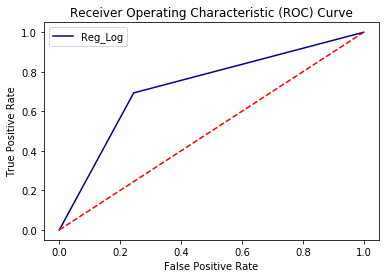

In [57]:
#Curva de ROC
grafica_curva_roc(fpr1, tpr1)

##### KNN

In [58]:
#Modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [59]:
# Predecimos sobre el x_test
y_pred_knn = knn.predict(x_test)

In [60]:
#Matrz de confusión
matriz_confusion_2 = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix :')
print(matriz_confusion_2) 

Confusion Matrix :
[[353 146]
 [ 99 152]]


In [61]:
#Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("La precisión del modelo es: %.3f" %accuracy_knn)

La precisión del modelo es: 0.673


In [62]:
#AUC
auc_knn = roc_auc_score(y_test, y_pred_knn)
print('AUC: %.2f' % auc_knn)
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_knn)

AUC: 0.66


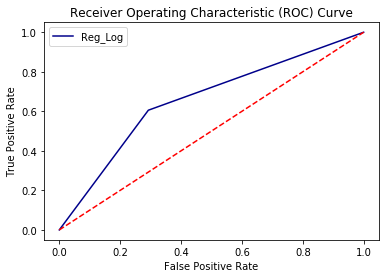

In [63]:
#Curva de ROC
grafica_curva_roc(fpr2, tpr2)

### Ejercicio 6

In [64]:
#armamos matriz de las varibles independientes de norespondieron(sacamos "pobre" y otras variables str)
x_noresp= norespondieron.drop(['CODUSU', 'CH05','PP09A_ESP','PP09C_ESP', 'IMPUTA'], axis=1).copy()
#convertimos en dummy a 'MAS_500'
x_noresp['MAS_500'] = np.where(x_noresp['MAS_500']=='S',1,0)
#Reemplazamos NaN
mediana_x_noresp = x_noresp.median()
x_noresp = x_noresp.fillna(mediana_x_noresp)
#chequeamos
x_noresp.head(5)

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,CH03,...,PP11L,PP11L1,PP11M,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T
2,2021,1,1,1,1,1,1,32,3090,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
3,2021,1,1,2,1,1,1,32,3090,2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
4,2021,1,1,3,1,1,1,32,3090,3,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
5,2021,1,1,4,1,1,1,32,3090,3,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
6,2021,1,1,5,1,1,1,32,3090,3,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0


In [65]:
#USAMOS EL MODELO ..... PARA PREDECIR
y_pred_noresp = lda.predict(x_noresp)
pobres = y_pred_noresp[y_pred_noresp ==1].sum()


In [66]:
total = norespondieron.shape[0]
print(total)

1549


In [67]:
proporcion_pobres = pobres/total*100
print(proporcion_pobres)
print(pobres)

38.54099418979987
597


#### Ejercicio 7

In [68]:
#Seleccionamos solo las variables que nos parecen relevantes para el análisis

x_train_nuevo = x_train[['NIVEL_ED', 'ESTADO', 'PP04A', 'INTENSI', 'PP07H']].copy()
x_test_nuevo = x_test[['NIVEL_ED', 'ESTADO', 'PP04A', 'INTENSI', 'PP07H']].copy()



In [69]:
# MODELO CON NUEVA BASE
log_reg_nuevo = LogisticRegression().fit(x_train_nuevo, y_train)
y_pred_nuevo = log_reg_nuevo.predict_proba(x_test_nuevo)[:,1]

y_pred_nuevo = np.where(y_pred_nuevo > 0.5, 1, y_pred_nuevo)
y_pred_nuevo = np.where(y_pred_nuevo <= 0.5, 0, y_pred_nuevo)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
#Matrz de confusión
matriz_confusion_nuevo = confusion_matrix(y_test, y_pred_nuevo)
print('Confusion Matrix :')
print(matriz_confusion_nuevo) 

Confusion Matrix :
[[452  47]
 [196  55]]


In [71]:
#Accuracy
print('"La precisión del modelo es:',accuracy_score(y_test, y_pred_nuevo))

"La precisión del modelo es: 0.676


In [72]:
# AUC y ROC
auc_nuevo = roc_auc_score(y_test, y_pred_nuevo)
print('AUC: %.2f' % auc_nuevo)
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_nuevo)

AUC: 0.56


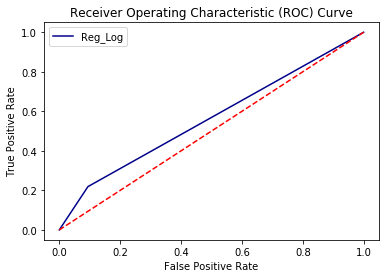

In [73]:
grafica_curva_roc(fpr3, tpr3)